### Simple Linear Regression.

In this notebook, I am going to show how to apply single linear regression to predict the CO2 Emissions of a car based on its characteristics. 

Note 1: this notebook was inspired by an online course on Coursera.

Note 2: this is the most basic thing that someone can do using Machine Learning. 


In [1]:
## Importing the libraries that we're going to use.
import pandas as pd #note that pd is just an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
## importing the machine learning tools that are used for this exercise.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



### Downloading the dataset.

Plenty of datasets are online and they come in different formats. Most importantly is to use the right pd.read_*** to be able to read your dataset into a DataFrame.

Note: You can either download them to your PC manually or use a line of code using python.

In [2]:
# !pip install wget
import wget

url= "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"


fuelcons = wget.download(url)



100% [..............................................................................] 72629 / 72629

### Importing the dataset.

After importing the data, it is always recommended to check what our data consists of.
A second step is to check the statistics of our data and understand how it behaves.

In [3]:
data_set=pd.read_csv("FuelConsumptionCo2.csv") ## read_csv is used to read csv files. 
## lots of options can be added but since the already organized, we will just use the default options.

data_set.head(10) ##visualize the first 10 rows


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
### stat summary. Note that it only mentions the numerical values.
data_set.describe()
## count for all the columns is = to 1067 which is the # of rows. so we do not have missing data.

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
## Let's take a closer look on our numerical data. 
data_numerical = data_set.select_dtypes(exclude=['object'])
## visualize 10 rows

data_numerical.head(10)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
5,2014,3.5,6,11.9,7.7,10.0,28,230
6,2014,3.5,6,11.8,8.1,10.1,28,232
7,2014,3.7,6,12.8,9.0,11.1,25,255
8,2014,3.7,6,13.4,9.5,11.6,24,267
9,2014,2.4,4,10.6,7.5,9.2,31,212


In [6]:
## Checking the data in order of CO2 Emissions. Any interesting insights?
data_numerical.sort_values(by="CO2EMISSIONS").head(10)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
988,2014,1.5,4,4.6,4.9,4.7,60,108
987,2014,1.8,4,4.7,4.9,4.8,59,110
487,2014,2.0,4,4.7,4.9,4.8,59,110
1042,2014,1.4,4,5.6,5.2,5.4,52,124
415,2014,2.0,4,5.3,5.7,5.5,51,126
989,2014,1.8,4,5.3,5.8,5.5,51,126
655,2014,1.8,4,5.5,5.8,5.6,50,129
970,2014,2.5,4,5.5,5.9,5.7,50,131
2,2014,1.5,4,6.0,5.8,5.9,48,136
342,2014,2.0,4,5.6,6.4,6.0,47,138


### Visualizing the Data (graphing).

Multiple ways to visualize the data exist. We are going to stick to the basic ones in the following.

Note: it is useful to visualize to discover the patterns in your data, especially if you do not have domain knowledge.

In general (not the absolute truth), the bigger the engine or number of cylinders or etc... the more the fuel consumption.

For the last few decades, cars have been getting optimized more and more to reduce the fuel consumption even for the bigger cars. 

Therefore, we do not expect to see a growing trend in all cases.

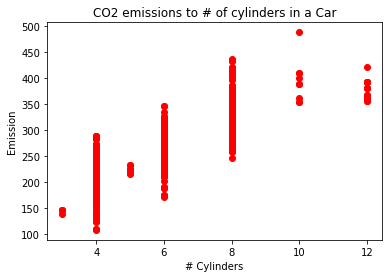

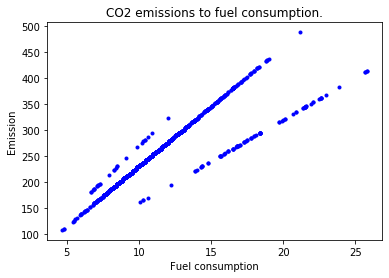

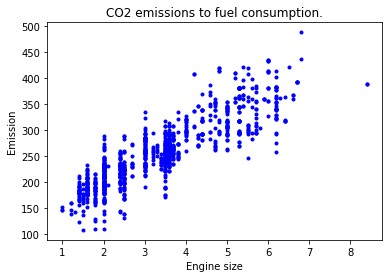

In [7]:
### Using the plot library we are going to draw a simple graph of CO2 vs cylinders 

plt.plot(data_numerical["CYLINDERS"],data_numerical["CO2EMISSIONS"],"o",color="r")
plt.title("CO2 emissions to # of cylinders in a Car")
plt.xlabel("# Cylinders")
plt.ylabel("Emission")
plt.show()


### We can try to visualize a different category
plt.plot(data_numerical["FUELCONSUMPTION_COMB"],data_numerical["CO2EMISSIONS"],".",color="b")
plt.title("CO2 emissions to fuel consumption.")
plt.xlabel("Fuel consumption")
plt.ylabel("Emission")
plt.show()

### Most importantly the engine size.

plt.plot(data_numerical["ENGINESIZE"],data_numerical["CO2EMISSIONS"],".",color="b")
plt.title("CO2 emissions to fuel consumption.")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Creating the model.

### Creating the train and test sets.

For this part we are going to use the numerical table only.

Feature selection is a delicate task if done manually due to its reliance on domain knowledge. In our dataset, some categorical data can be a great indicator for fuel consumption but we are going to disregard them to simplify the model.



In [8]:
## We are going to consider that our feature is just one of the columns for this example ==> Engine size.
features=data_numerical["ENGINESIZE"] #==> predictor
target=data_numerical["CO2EMISSIONS"] #==>to be predicted

## using the function train_test_split , the splitting of data becomes easier. test size is 20%.
# random state allows to keep the results the same everytime we run the model.

X_train,X_test,y_train,y_test= train_test_split(features,target,test_size=0.2,random_state=5)



In [9]:
print("First 10 values of Engine sizes:")
print(X_train.values[:10])
print("First 10 values of co2 consump:\n",y_train.values[:10])

First 10 values of Engine sizes:
[3.7 3.7 3.7 3.6 3.6 5.  4.  2.4 1.8 5. ]
First 10 values of co2 consump:
 [255 244 262 250 251 345 301 225 216 315]


### Creating the LinearReg model.

In [10]:
## model creation
linreg= LinearRegression()

## Reshaping the data pre-fitting
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

## fitting the data to the model

linreg.fit(X_train,y_train) 

## Predicting the X_test

predicted_y=linreg.predict(X_test)

## Checking the score.

print("Correlation score:",linreg.score(X_test,y_test))
print("Squared mean error:", np.mean((predicted_y-y_test)**2))
##compares the predicted values of X_test with the y_Test and gives R^2 if its 1 then our model is perfect


## Getting the intercept and coefficient
print ('Coefficients: ', linreg.coef_)
print ('Intercept: ',linreg.intercept_)


Correlation score: 0.7946493786721367
Squared mean error: 934.0663127815484
Coefficients:  [38.38333382]
Intercept:  127.63656734528247


### Plotting the outputs.

Seeing the R score alone is a good indicator. But it would be better to visualize the model that we got. Visualizing can be an indicator if the model can be improved or not.

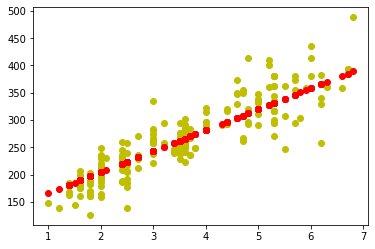

In [11]:
plt.plot(X_test,y_test,'o',color='y') ## real model in yellow
plt.plot(X_test,predicted_y,'o',color='r') ## predicted model


## we can see that the model passes through most of the points distribution


## Future steps: 
#### Experimenting with a multiple linear models. In other words, using multiple features to predict the Model. We can expect a small improvement over the simple linear model.